In [3]:
import networkx as nx
import matplotlib.pyplot as plt 

In [24]:
class grafo:
    #class initializer
    def __init__(self, vertices = 0, dirigido = True):
        """
        Docstring:
        vertices: the number of vertices of the graph, this should always be 0 at the beginning
        Dirigido: to know whetear it is a directed or non-directed graph
        """
        self.VerticesNum = vertices
        #list where all the names of the nodes are saved
        self.Allvertex = []
        #dictionary of dictionaries that contain the node and its neoghbors incluiding the value of the edge
        self.Vertexneighbors = {}
        #dictionary to save only the neighbor without the weight of the edges
        self.Neighbors = {}
        #dictionary that contains the value of edges and the direction from node to the other node
        self.edges = {}
        self.directed = dirigido
        self.trampa = True
        
        
    def newvertex(self, key):
        """
        Docstring: Function to add a new node
        key is the name of the node
        """
        self.Allvertex.append(key)
        self.VerticesNum += 1
        self.Vertexneighbors[key] = []
        self.Neighbors[key] = []
        
    def AddEdge(self, nodeA, nodeB, value = 1):
        if nodeA not in self.Allvertex:
            self.newvertex(nodeA)
        if nodeB not in self.Allvertex:
            self.newvertex(nodeB)  
        if self.directed:
            if {nodeB: value} not in self.Vertexneighbors[nodeA]:
                self.Vertexneighbors[nodeA].append({nodeB: value})
                self.Neighbors[nodeA].append(nodeB)
            self.edges[str(nodeA)+" -> "+str(nodeB)] = value
        else:
            if {nodeB: value} not in self.Vertexneighbors[nodeA]:
                self.Vertexneighbors[nodeA].append({nodeB: value})
                self.Neighbors[nodeA].append(nodeB)
        #if it is a non directed graph
            if {nodeA: value} not in self.Vertexneighbors[nodeB]:
                self.Vertexneighbors[nodeB].append({nodeA: value})
                self.Neighbors[nodeB].append(nodeA)
                
            self.edges[str(nodeA)+" -> "+str(nodeB)] = value
            self.edges[str(nodeB)+" -> "+str(nodeA)] = value
            
            
    def Vertices(self):
        for i in self.Allvertex:
            print(i)
            
    def NeighborsOfANode(self, node):
        print(self.Vertexneighbors[nodeA])
        
    def Edges(self):
        print(self.edge)
        
    def BellmanFord(self, source):
        """
        Docstring: function to make get the shorthest path through BellmanFord
        source is from which node you will begin 
        """
        #dictionary to save the distances 
        distances = {}
        #giving a value to the distances where the source have value 0 and the rest infinity
        for i in self.Allvertex:
            if i == source:
                distances[i] = 0
            else:
                distances[i] = float('inf')
                
        #for to get the distances
        for i in range(self.VerticesNum):
            for j in list(self.edges.keys()):
                nodes = j.split(" ")
                if distances[nodes[0]] != float("Inf") and distances[nodes[0]] + self.edges[j] < distances[nodes[2]]:
                    distances[nodes[2]] = distances[nodes[0]] + self.edges[j]
                    
        #loop to check if there is a negative cycle
        for j in list(self.edges.keys()):
            nodes = j.split(" ")
            if distances[nodes[0]] != float("Inf") and distances[nodes[0]] + self.edges[j] < distances[nodes[2]]:
                print("The graph contain a negative cycle")
                return 
        print(distances)
        
    def minValue(self, dist, source, usados):
        """
        Function to get the min value of a node
        dist is the distances values, source is the node already used and usados are the nodes that are not used yet
        return the node with the lowest value
        """
        x = float("inf")
        y = source
        for i in list(dist.keys()):
            if dist[i] < x and i != source and (i in usados):
                x = dist[i]
                y = i
        return y
    
    def Dijkstra(self, source):
        """
        Docstring: function to make get the shorthest path through Dijkstra
        source is from which node you will begin 
        """
        distances = {}
        for i in self.Allvertex:
            if i == source:
                distances[i] = 0
            else:
                distances[i] = float('inf')
        used = list(distances.keys())
        while len(used) != 0:
            u = self.minValue(distances, source, used)
            for i in self.Vertexneighbors[u]:
                key = list(i.keys())[0]
                if distances[u] != float("Inf") and distances[u] + i[key] < distances[key]:
                    distances[key] = distances[u] + i[key]
            try:
                index = used.index(u)
                used.pop(index)
                source = u
            except:
                print(distances)
                return
        print(distances)
        
    def BFS(self, source):
        """
        Function to get the Breadth first search
        source is the node to start
        """
        allnodes = self.Allvertex[:]
        queue = []
        visitados = {}
        queue.append(source)
        for i in self.Allvertex:
            if i == source:
                visitados[i] = 1
            else:
                visitados[i] = 0
        while len(queue) != 0 or len(allnodes) != 0:
            allnodes = [a for a in allnodes if a not in queue]
            if len(queue) > 0:
                node = queue.pop(0)
                print(node)
            else:
                node = allnodes.pop(0)
                visitados[node] = 1
                print(node)
            for j in self.Vertexneighbors[node]:
                i = list(j.keys())[0]
                if visitados[i] == 0:
                    print('visitado: ',i)
                    queue.append(i)
                    visitados[i] = 1
                 
    def DFS(self, source):
        """
        Function t get the Depth first search
        source is the node to start
        """
        allnodes = self.Allvertex[:]
        stack = []
        visitados = {}
        stack.append(source)
        for i in self.Allvertex:
            if i == source:
                visitados[i] = 1
            else:
                visitados[i] = 0
                
        print(source)
        for j in self.Allvertex:
            llave = j
            if visitados[llave] == 0:
                print(llave)
                visitados[llave] = 1
                self.dfs(llave, stack, visitados)
            
    def dfs(self, node, stack, visitados):
        """
        Function to visit all the adjacent nodes
        """
        for j in self.Vertexneighbors[node]:
            llave = list(j.keys())[0]
            if visitados[llave] == 0:
                print(llave)
                stack.append(llave)
                visitados[llave] = 1
                self.dfs(llave, stack, visitados)
              
            
    def buscarvalor(self, llave, valor):
        """
        Function to look for the value of the edge between two nodes
        llave is the from node and valor is the to node
        """
        for j in self.Vertexneighbors[llave]:
            llave = list(j.keys())[0]
            if llave == valor:
                return j[llave]
        return float("inf")
    
    def FloydWarshall(self):
        """
        Function to get the shorthest between each node
        """
        matrix = []
        lista = sorted(self.Allvertex)
        h = 0
        for j in lista:
            matrix.append([])
            for i in lista:
                if j == i:
                    matrix[h].append(0)
                else:
                    matrix[h].append(self.buscarvalor(j,i)) 
            h += 1
            
        size = len(matrix)
        self.printmatrix(matrix)
        for i in range(size):
            for j in range(size):
                for k in range(size):
                    if matrix[j][k] > matrix[j][i] + matrix[i][k]:
                        matrix[j][k] = matrix[j][i] + matrix[i][k]
            self.printmatrix(matrix)
            
    def printmatrix(self, matriz):
        for i in matriz:
            print(i)
                
        print("\n\n")
                
    
    def HamiltonCycle(self, startpoint, memory):
        """
        Function to get the hamilton cycle
        Input: the start point
        output: print all the paths
        """
        size = len(self.Allvertex)
        paths = [startpoint]
        #goes to the hamilton function to get all the paths
        self.hamilton(startpoint, size, paths, memory)
        if self.trampa:
            print("There is no hamilton cycle")
    
    def hamilton(self,startpoint, size,paths = [], memory = []):
        """
        Function to get all the paths
        """
        size = len(self.Allvertex)
        #condition to check if it all the nodes have been visited 
        print(paths)
        if len(paths) == size:
            #condition to check if the last node visited is adjacent to the start point
            if paths[0] in self.Neighbors[paths[size-1]]:
                #auxiliar array to prin
                aux = paths[:]
                #adding the startpoint to the end
                aux.append(paths[0])
                self.trampa = False
                memory.append(aux)
                print(aux)
            return paths
        #going to the adjacent vertex
        for i in self.Neighbors[startpoint]:
            #checking if the vertex has not been used
            if i not in paths:
                #adding to used nodes
                paths.append(i)
                #going recursively to get the next adjacent node
                self.hamilton(i, size,paths, memory)
                #applying backtracking 
                paths.pop()
        

In [55]:
G = grafo(dirigido = False)

In [56]:
G.AddEdge(0,1,1)
G.AddEdge(0,2,1)
G.AddEdge(0,3,1)
G.AddEdge(1,2,1)
G.AddEdge(1,3,1)
G.AddEdge(2,3,1)

In [57]:
Gpaths = []

In [58]:
G.HamiltonCycle(3, Gpaths)

[3]
[3, 0]
[3, 0, 1]
[3, 0, 1, 2]
[3, 0, 1, 2, 3]
[3, 0, 2]
[3, 0, 2, 1]
[3, 0, 2, 1, 3]
[3, 1]
[3, 1, 0]
[3, 1, 0, 2]
[3, 1, 0, 2, 3]
[3, 1, 2]
[3, 1, 2, 0]
[3, 1, 2, 0, 3]
[3, 2]
[3, 2, 0]
[3, 2, 0, 1]
[3, 2, 0, 1, 3]
[3, 2, 1]
[3, 2, 1, 0]
[3, 2, 1, 0, 3]


In [59]:
Gpaths

[[3, 0, 1, 2, 3],
 [3, 0, 2, 1, 3],
 [3, 1, 0, 2, 3],
 [3, 1, 2, 0, 3],
 [3, 2, 0, 1, 3],
 [3, 2, 1, 0, 3]]

In [60]:
G1 = nx.Graph()
G1.add_nodes_from([0 , 1, 2])
G1.add_edge(0,1)
G1.add_edge(0,2)
G1.add_edge(0,3)
G1.add_edge(1,2)
G1.add_edge(1,3)
G1.add_edge(2,3)

In [61]:
i = Gpaths[0]

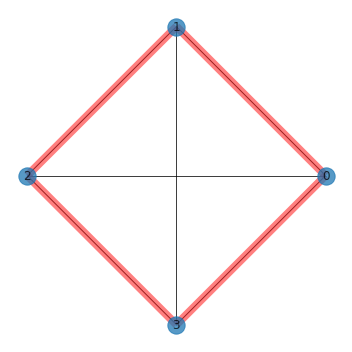

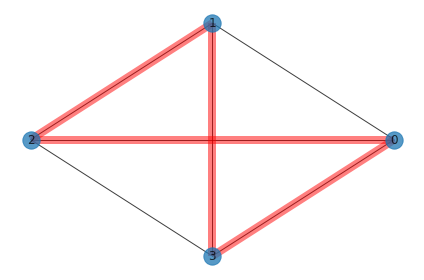

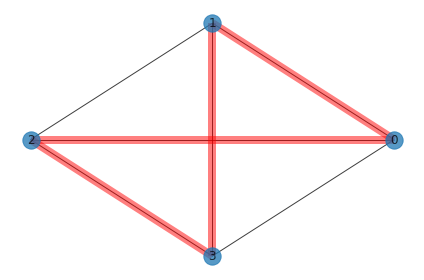

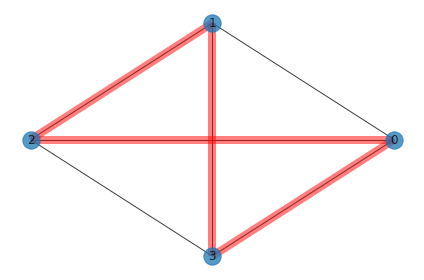

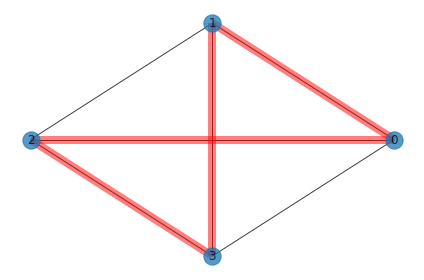

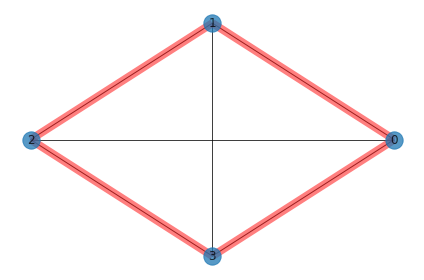

In [100]:
plt.figure(figsize=(5,5))
j = 1
for i in Gpaths:
    edges = [(i[j], i[j+1] ) for j in range(len(i)-1)]
    pos = nx.kamada_kawai_layout(G1)

    nx.draw_networkx(G1, pos, alpha = 0.75, with_labels = True)
    nx.draw_networkx_edges(G1,pos,edgelist=edges, width=8,alpha=0.5,edge_color='r')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [70]:
H = grafo(dirigido = False)

In [71]:
H.AddEdge(1,2,1)
H.AddEdge(1,3,1)
H.AddEdge(1,6,1)
H.AddEdge(2,6,1)
H.AddEdge(2,5,1)
H.AddEdge(2,3,1)
H.AddEdge(3,4,1)
H.AddEdge(4,5,1)
H.AddEdge(5,6,1)

In [72]:
Hpaths = []

In [73]:
H.HamiltonCycle(1, Hpaths)

[1]
[1, 2]
[1, 2, 6]
[1, 2, 6, 5]
[1, 2, 6, 5, 4]
[1, 2, 6, 5, 4, 3]
[1, 2, 6, 5, 4, 3, 1]
[1, 2, 5]
[1, 2, 5, 4]
[1, 2, 5, 4, 3]
[1, 2, 5, 6]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 1]
[1, 3]
[1, 3, 2]
[1, 3, 2, 6]
[1, 3, 2, 6, 5]
[1, 3, 2, 6, 5, 4]
[1, 3, 2, 5]
[1, 3, 2, 5, 4]
[1, 3, 2, 5, 6]
[1, 3, 4]
[1, 3, 4, 5]
[1, 3, 4, 5, 2]
[1, 3, 4, 5, 2, 6]
[1, 3, 4, 5, 2, 6, 1]
[1, 3, 4, 5, 6]
[1, 3, 4, 5, 6, 2]
[1, 3, 4, 5, 6, 2, 1]
[1, 6]
[1, 6, 2]
[1, 6, 2, 5]
[1, 6, 2, 5, 4]
[1, 6, 2, 5, 4, 3]
[1, 6, 2, 5, 4, 3, 1]
[1, 6, 2, 3]
[1, 6, 2, 3, 4]
[1, 6, 2, 3, 4, 5]
[1, 6, 5]
[1, 6, 5, 2]
[1, 6, 5, 2, 3]
[1, 6, 5, 2, 3, 4]
[1, 6, 5, 4]
[1, 6, 5, 4, 3]
[1, 6, 5, 4, 3, 2]
[1, 6, 5, 4, 3, 2, 1]


In [74]:
H1 = nx.Graph()

In [75]:
H1.add_edge(1,2)
H1.add_edge(1,3)
H1.add_edge(1,6)
H1.add_edge(2,6)
H1.add_edge(2,5)
H1.add_edge(2,3)
H1.add_edge(3,4)
H1.add_edge(4,5)
H1.add_edge(5,6)

In [77]:
Hpaths

[[1, 2, 6, 5, 4, 3, 1],
 [1, 2, 3, 4, 5, 6, 1],
 [1, 3, 4, 5, 2, 6, 1],
 [1, 3, 4, 5, 6, 2, 1],
 [1, 6, 2, 5, 4, 3, 1],
 [1, 6, 5, 4, 3, 2, 1]]

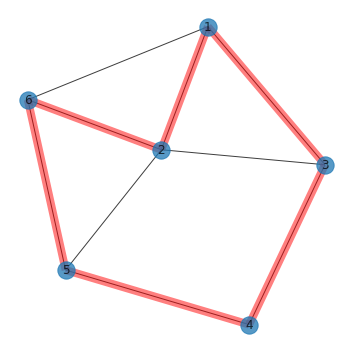

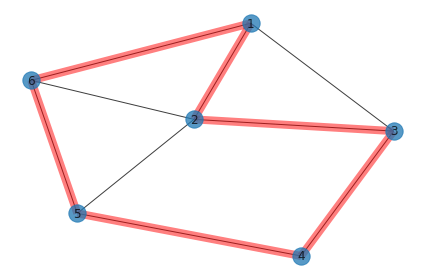

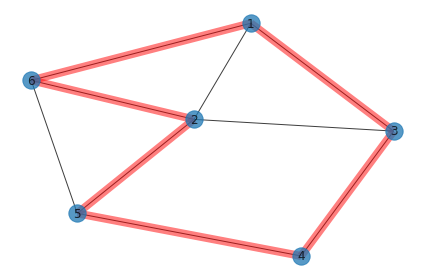

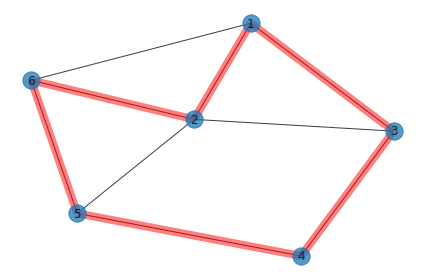

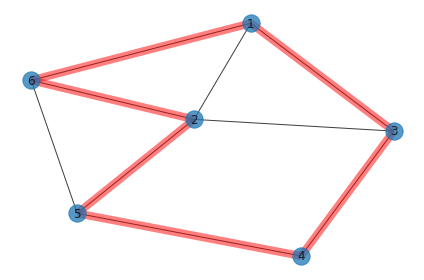

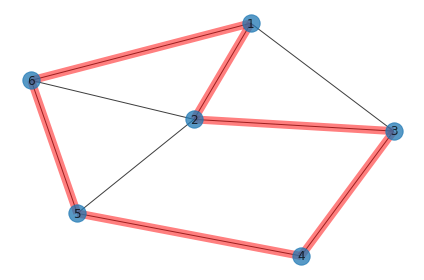

In [99]:
plt.figure(figsize=(5,5))
j = 1
for i in Hpaths:
    edges = [(i[j], i[j+1] ) for j in range(len(i)-1)]
    pos = nx.kamada_kawai_layout(H1)

    nx.draw_networkx(H1, pos, alpha = 0.75, with_labels = True)
    nx.draw_networkx_edges(H1,pos,edgelist=edges, width=8,alpha=0.5,edge_color='r')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [82]:
J = grafo(dirigido = True)

In [83]:
J.AddEdge(1,2,1)
J.AddEdge(2,3,1)

In [84]:
Jpaths = []

In [85]:
J.HamiltonCycle(1, J1)

[1]
[1, 2]
[1, 2, 3]
There is no hamilton cycle


In [86]:
J1 = nx.Graph()

In [87]:
J1.add_edge(1,2)
J1.add_edge(2,3)

In [101]:
plt.figure(figsize=(5,5))
j = 1
for i in Jpaths:
    edges = [(i[j], i[j+1] ) for j in range(len(i)-1)]
    pos = nx.kamada_kawai_layout(J1)

    nx.draw_networkx(J1, pos, alpha = 0.75, with_labels = True)
    nx.draw_networkx_edges(J1,pos,edgelist=edges, width=8,alpha=0.5,edge_color='r')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

<Figure size 360x360 with 0 Axes>

In [90]:
T = grafo(dirigido = True)
T.AddEdge(1,2,1)
T.AddEdge(2,3,1)
T.AddEdge(3,1,1)

In [91]:
Tpaths  = []

In [92]:
T.HamiltonCycle(1, Tpaths)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 1]


In [93]:
T1 = nx.DiGraph()

In [94]:
T1.add_edge(1,2)
T1.add_edge(2,3)
T1.add_edge(3,1)

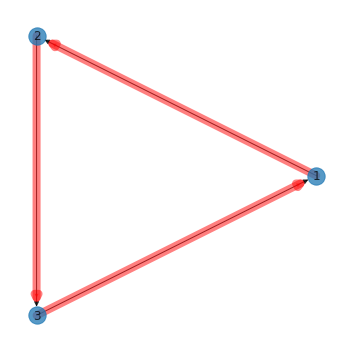

In [98]:
plt.figure(figsize=(5,5))
j = 1
for i in Tpaths:
    edges = [(i[j], i[j+1] ) for j in range(len(i)-1)]
    pos = nx.kamada_kawai_layout(T1)

    nx.draw_networkx(T1, pos, alpha = 0.75, with_labels = True)
    nx.draw_networkx_edges(T1,pos,edgelist=edges, width=8,alpha=0.5,edge_color='r')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

$\\ Starting \space from  \space loops
\\ C1 \space \space \space N
\\ C2 \space \space \space N - 1
\\ This \space  is \space  the cost \space  if  \space there  \space is \space no \space recursion \space but \space since \space there \space is \space recursion, \space in first \space recursion \space the cost \space is  
\\ C1 \space \space \space N * N
\\ C2 \space \space \space (N - 1) * (N- 1) 
\\ third \space recursion
\\ C1 \space \space \space N * N * N
\\ C2 \space \space \space (N - 1) * (N- 1) * (N-1)
\\ As \space you \space can \space see \space the \space time \space complexity \space is 
\\ F(N) \epsilon O(N^N)$

```
hamiltonCycle(grafo, startpoint, size, paths):
    if startpoint is not in paths:
        paths.push(startpoint)
    
    if paths.length = size:
        if paths[0] is adjacent to paths[size-1]:
            paths[size] = paths[0]
            
        return paths
    
    for i in GraphsNodes:
        if i not in paths and i is adjacent to startpoint
            paths.push(i)

            hamiltonCycle(grafo, i, size, paths)

            paths.pop()
            
```